# Problem2

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

# a.

In [8]:
# read data

In [9]:
data=pd.read_csv('prices.csv')

In [10]:
a=list(data['AAPL'])

In [11]:
# find the max price

In [12]:
b=max(a)

In [13]:
# find the date when stock price was at highest price

In [19]:
for i in range(len(a)):
    if data.at[i,'AAPL']==b:
        date=data.at[i,'Date']
        print(date)

2018-10-03


In [20]:
date

'2018-10-03'

# b.

In [21]:
# remove column Date -save it to Date_col

In [22]:
Date_col=data.pop('Date')

In [26]:
# keep a copy

In [29]:
close_px=data.copy()

In [30]:
close_px.index=Date_col

In [32]:
# show net returns

In [33]:
net_returns = data / data.shift(1) - 1
net_returns[:5]

,AAPL,CVX,IBM,XOM,GS,BA,TEVA,CME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.028172,-0.039971,-0.015735,-0.027362,-0.031223,-0.006926,-0.020100,0.005673
2,0.000094,-0.000463,-0.021566,-0.005316,-0.020229,-0.011778,-0.002904,-0.015230
3,0.014022,-0.000833,-0.006535,0.010132,0.014903,0.015526,0.041689,0.011571
4,0.038422,0.022883,0.021735,0.016645,0.015966,0.017682,0.006641,0.004643


In [34]:
# add dates to net_returns

In [35]:
daily_pc=net_returns.copy()
daily_pc.index=Date_col

In [36]:
daily_pc[:5]

,AAPL,CVX,IBM,XOM,GS,BA,TEVA,CME
Date,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.039971,-0.015735,-0.027362,-0.031223,-0.006926,-0.020100,0.005673
2015-01-06,0.000094,-0.000463,-0.021566,-0.005316,-0.020229,-0.011778,-0.002904,-0.015230
2015-01-07,0.014022,-0.000833,-0.006535,0.010132,0.014903,0.015526,0.041689,0.011571
2015-01-08,0.038422,0.022883,0.021735,0.016645,0.015966,0.017682,0.006641,0.004643


In [40]:
# show daily cumulative returns

In [42]:
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

,AAPL,CVX,IBM,XOM,GS,BA,TEVA,CME
Date,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.971828,0.960029,0.984265,0.972638,0.968777,0.993074,0.979900,1.005673
2015-01-06,0.971920,0.959584,0.963038,0.967467,0.949179,0.981377,0.977054,0.990356
2015-01-07,0.985548,0.958785,0.956744,0.977270,0.963325,0.996614,1.017787,1.001815
2015-01-08,1.023415,0.980725,0.977539,0.993537,0.978705,1.014236,1.024546,1.006467


In [43]:
# plot all daily cumulative returns

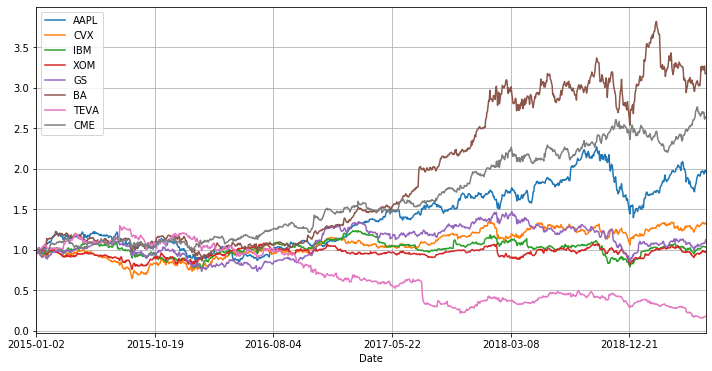

In [45]:
daily_cr.plot(figsize=(12,6))
plt.grid()

In [46]:
# find daily_cumulative return of AAPL on 2019-6-28

In [49]:
value=daily_cr.at['2019-06-28','AAPL']
value

1.9569162392855737

In [51]:
# get the wealth had you invested 100 dollars in Jan 2015 in AAPL

In [52]:
wealth=100*value
wealth

195.69162392855736

# c.

In [57]:
# correlation matrix for all stocks returns

In [62]:
corrs=close_px.corr()
corrs

,AAPL,CVX,IBM,XOM,GS,BA,TEVA,CME
AAPL,1.000000,0.850644,0.206996,0.308802,0.660447,0.931886,-0.839077,0.905804
CVX,0.850644,1.000000,0.401756,0.602723,0.650005,0.879567,-0.903758,0.886432
IBM,0.206996,0.401756,1.000000,0.483406,0.611733,0.115442,-0.292792,0.124054
XOM,0.308802,0.602723,0.483406,1.000000,0.215939,0.280433,-0.366870,0.296182
GS,0.660447,0.650005,0.611733,0.215939,1.000000,0.573239,-0.669095,0.539855
BA,0.931886,0.879567,0.115442,0.280433,0.573239,1.000000,-0.865638,0.965883
TEVA,-0.839077,-0.903758,-0.292792,-0.366870,-0.669095,-0.865638,1.000000,-0.894957
CME,0.905804,0.886432,0.124054,0.296182,0.539855,0.965883,-0.894957,1.000000


In [63]:
# from the output, we can easily know the most highly correlated stocks are AAPL,CVX,BA and CME

In [64]:
# scatter matrix plot for these four stocks

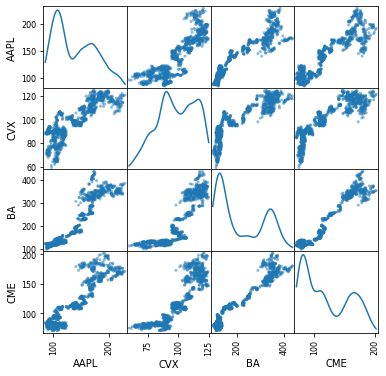

In [68]:
scatter_matrix(close_px[['AAPL','CVX','BA','CME']], diagonal='kde', figsize=(6,6));

# d.

In [70]:
# 4-in-1 plot

Text(0, 0.5, 'daily returns')

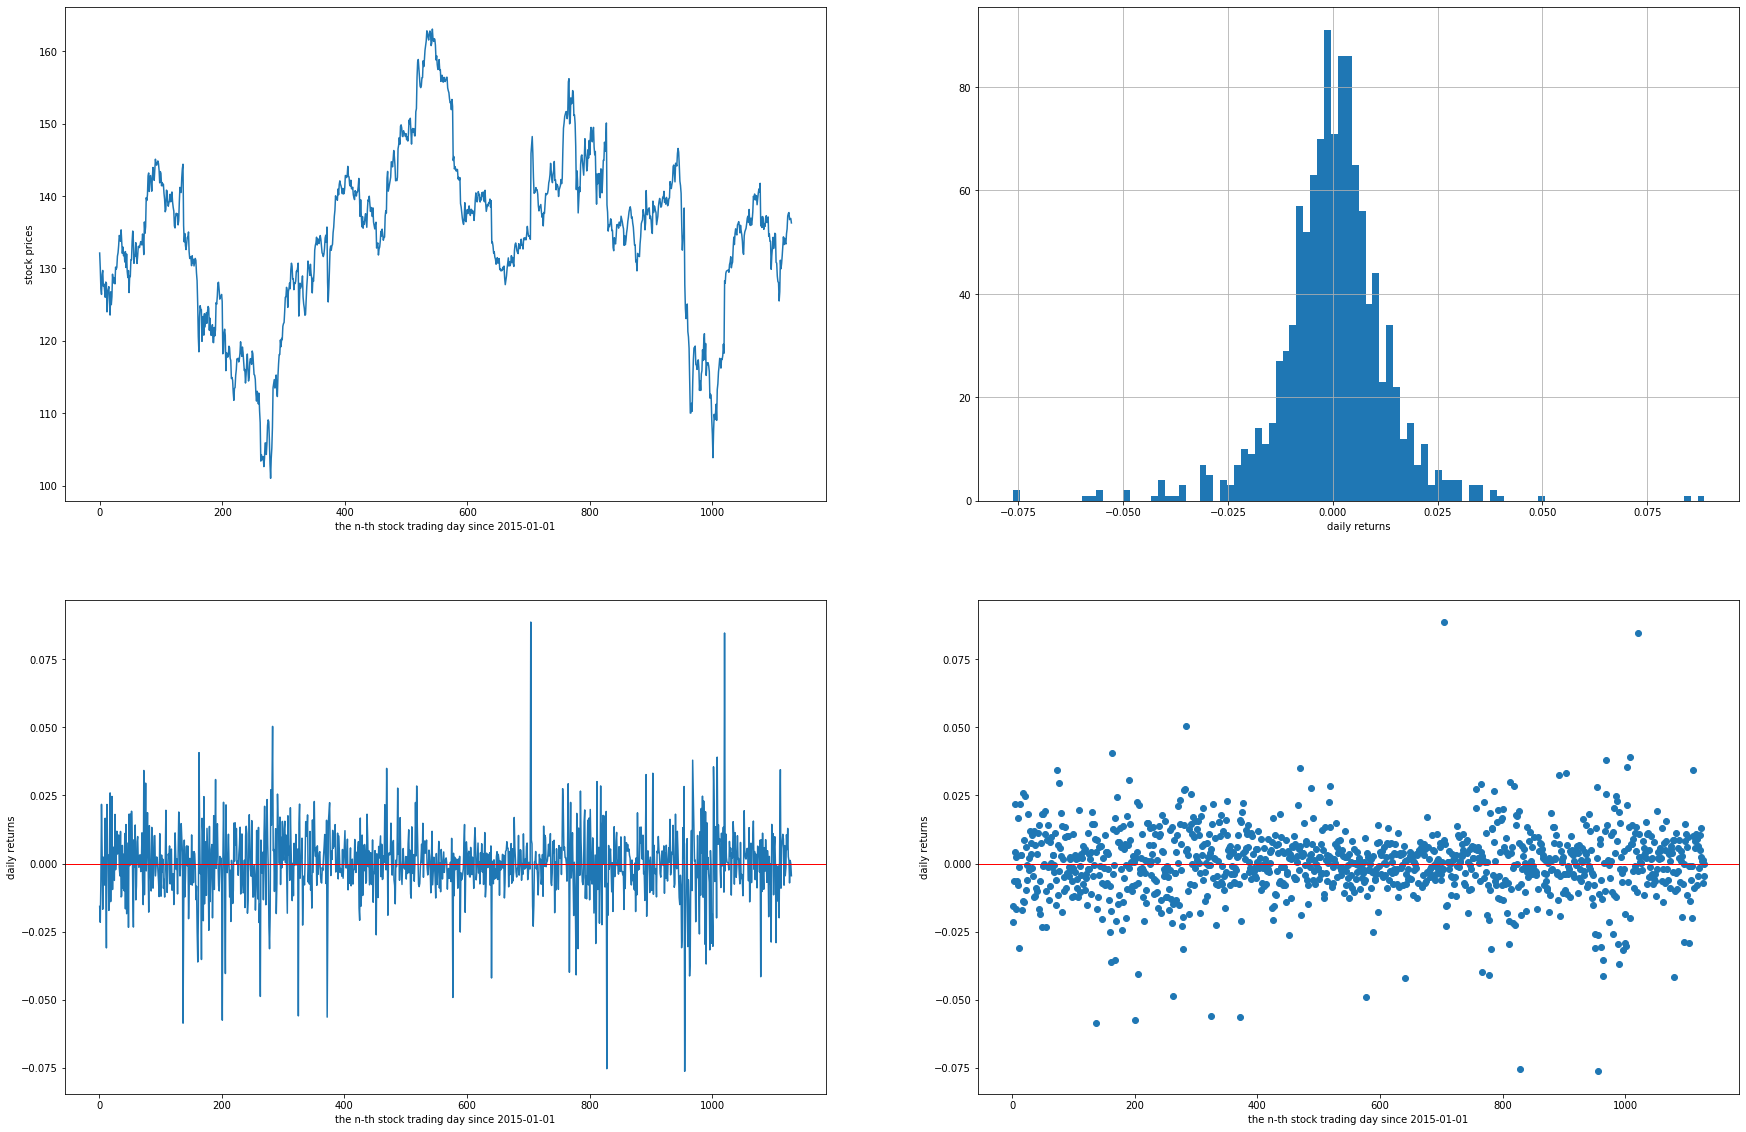

In [127]:
fig,axs=plt.subplots(2,2,figsize=(30,20))
axs[0,0].plot(data['IBM'])
axs[0,0].set_xlabel('the n-th stock trading day since 2015-01-01')
axs[0,0].set_ylabel('stock prices')
axs[0,1].hist(net_returns['IBM'],bins=100)
axs[0,1].set_xlabel('daily returns')
axs[0,1].grid()
axs[1,0].plot(net_returns['IBM'])
axs[1,0].axhline(linewidth=1, color='r')
axs[1,0].set_xlabel('the n-th stock trading day since 2015-01-01')
axs[1,0].set_ylabel('daily returns')
axs[1,1].plot(net_returns['IBM'],"o")
axs[1,1].axhline(linewidth=1, color='r')
axs[1,1].set_xlabel('the n-th stock trading day since 2015-01-01')
axs[1,1].set_ylabel('daily returns')